In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [5]:
n =  15
x_ = list(range(0, n))
y_ = []
for i in range(0, n):
    y_.append(2 * x_[i] + rnd.randint(-5, 5))

x = np.array(x_) * 2
y = np.array(y_)

In [6]:
#calculating variables needed for m and c
Ex = sum(x)
Ex_sqr = sum(x**2)
Ey = sum(y)
Exy = sum(x*y)

In [8]:
m = (n * Exy - Ex * Ey) / (n * Ex_sqr - Ex**2)

c = (Ey * Ex_sqr - Ex*Exy) / (Ex_sqr - Ex**2)
print("m: ", m)
print("c: ", c)

m:  1.0517857142857143
c:  0.527972027972028


In [9]:
def MSE(x, y):
    n = len(x)
    # (actual - predicted)/n
    return 1/n * sum((y - (m*x + c))**2)
MSE(x,y)

15.506204304145736

In [10]:
#prediction
def predict(x):
    y_ = m * x + c
    return y_

In [12]:
print(x)
y_hat = predict(x)
print(y_hat)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]
[ 0.52797203  2.63154346  4.73511489  6.83868631  8.94225774 11.04582917
 13.1494006  15.25297203 17.35654346 19.46011489 21.56368631 23.66725774
 25.77082917 27.8744006  29.97797203]


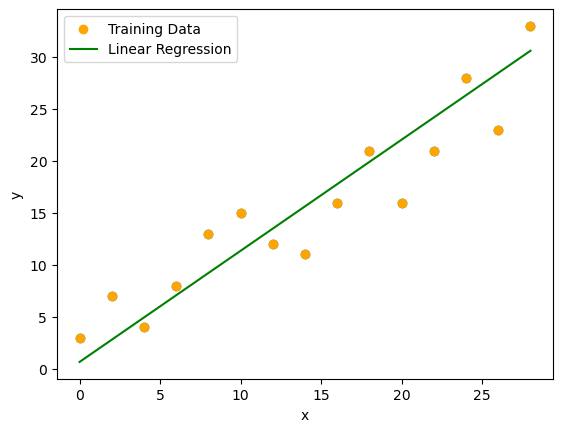

In [370]:
plt.scatter(x,y)

plt.scatter(x, y, color = 'orange',label='Training Data')
plt.plot(x, y_hat, color = 'green', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [331]:
predict(5)

6.009053446553446

In [13]:
#testing data
x_new = list(range(1,15))
x_new = np.array(x_new)
print(x_new)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [14]:
y_test = []
for i in range(0, 14):
    y_test.append(2 * x_[i] + rnd.randint(-5, 5))

y_test = np.array(y_test)
print(y_test)

[-4  4  1  7  4  7 11 12 21 13 17 26 19 25]


In [15]:
MSE_new = MSE(x_new, y_test)
print(MSE_new)

35.69490232115848


In [16]:
#predicted data
y_pred = []
for i in range(len(x)):
    y_pred.append(predict(x[i]))
y_pred = np.array(y_pred)
print(y_pred)

[ 0.52797203  2.63154346  4.73511489  6.83868631  8.94225774 11.04582917
 13.1494006  15.25297203 17.35654346 19.46011489 21.56368631 23.66725774
 25.77082917 27.8744006  29.97797203]


15   15


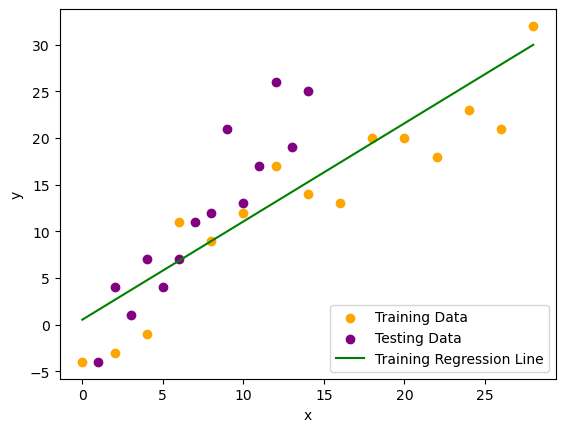

In [17]:
print(len(x), " ", len(y))
plt.scatter(x, y, color = 'orange',label='Training Data')
plt.scatter(x_new, y_test, color='purple', label='Testing Data')
plt.plot(x, y_pred, color = 'green', label='Training Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


In [377]:
# Gradient Descent
import pandas as pd
def grad_descent(x, y, learning_rate, iterations):
    theta0 = 0.001
    theta1 = 0.001

    
    # Create a DataFrame to store the results
    columns = ['Iteration', 'Theta0', 'Theta1']
    results_df = pd.DataFrame(columns=columns)
    
    for i in range(iterations):
        pred = [theta0 + theta1 * i for i in x]

        theta0_grad = (1 / n) * sum(pred[i] - y[i] for i in range(n))
        theta1_grad = (1 / n) * sum((pred[i] - y[i]) * x[i] for i in range(n))

        theta0 = theta0 - learning_rate * theta0_grad
        theta1 = theta1 - learning_rate * theta1_grad

        results_df = results_df.append({'Iteration': i, 'Theta0': theta0, 'Theta1': theta1}, ignore_index=True)

    return theta0, theta1



In [354]:
learning_rate = 0.0001
iterations = 10000
theta0, theta1 = grad_descent(x, y, learning_rate, iterations)

y_pred_gradec = [theta0 + theta1 * i for i in x]


In [355]:
print("y_train", y_train)
print("y_pred with Gradient Descent", y_pred_gradec)
print("theta 0 (y-intercept): ", theta0)
print("theta 1 (gradient): ", theta1)
print("y intercept: ", c)
print("gradient: ", m)

y_train [ 4  7 -1  9 12 10 12 19 15 16 23 22 25 31]
y_pred with Gradient Descent [-0.339358976178188, 1.6719717418594682, 3.6833024598971242, 5.69463317793478, 7.705963895972436, 9.717294614010092, 11.728625332047748, 13.739956050085405, 15.75128676812306, 17.762617486160714, 19.77394820419837, 21.785278922236028, 23.796609640273683, 25.80794035831134, 27.819271076348997]
theta 0 (y-intercept):  -0.339358976178188
theta 1 (gradient):  1.005665359018828
y intercept:  0.6608391608391608
gradient:  1.0696428571428571


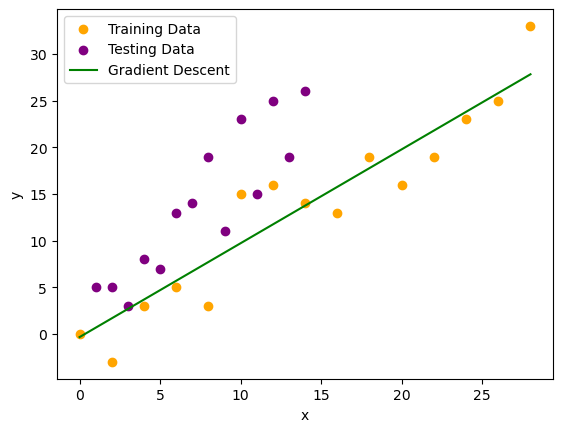

In [361]:
plt.scatter(x, y, color = 'orange', label='Training Data')
plt.scatter(x_new, y_test, color='purple', label='Testing Data')
plt.plot(x, y_pred_gradec, color = 'green', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()